In [10]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cellphones.csv')

In [3]:
X = df

In [5]:
X = X.drop(columns=['price_range'])

In [6]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [7]:
X_b = np.c_[X]

In [8]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_b)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

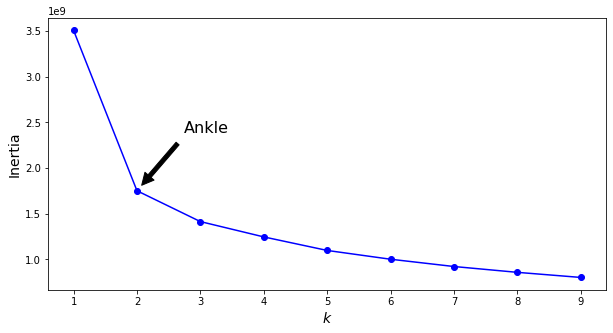

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Ankle',
             xy=(2, inertias[1]),
             xytext=(0.30, 0.60),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [12]:
k=2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_b)

In [13]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [14]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.23395797e+03 5.04398827e-01 1.52434018e+00 5.21016618e-01
  4.38807429e+00 5.25904203e-01 3.25522972e+01 4.96285435e-01
  1.40114370e+02 4.54936461e+00 1.01065494e+01 6.25039101e+02
  1.24369013e+03 3.03991202e+03 1.23822092e+01 5.95014663e+00
  1.09775171e+01 7.69305963e-01 4.87781036e-01 5.17106549e-01]
 [1.24329376e+03 4.85158649e-01 1.52006141e+00 4.97441146e-01
  4.22722620e+00 5.16888434e-01 3.15168884e+01 5.07471853e-01
  1.40389969e+02 4.49027636e+00 9.71750256e+00 6.66121801e+02
  1.25970931e+03 1.16540020e+03 1.22272262e+01 5.57523030e+00
  1.10460594e+01 7.53326510e-01 5.18935517e-01 4.96417605e-01]]


In [20]:
print("CLASE 1:")
print("Número de datos: " + str(len(X_b[y_pred==0])))
print("Poder de la batería: " + str(X_b[y_pred==0][:, 0].mean()))
print("Bluetooth: " + str(X_b[y_pred==0][:, 1].mean()))
print("Velocidad microprocesador: " + str(X_b[y_pred==0][:, 2].mean()))
print("Soporte dual sim: " + str(X_b[y_pred==0][:, 3].mean()))
print("Megapixeles cámara delantera: " + str(X_b[y_pred==0][:, 4].mean()))
print("Tiene 4G: " + str(X_b[y_pred==0][:, 5].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==0][:, 6].mean()))
print("Profundidad (cm): " + str(X_b[y_pred==0][:, 7].mean()))
print("Peso: " + str(X_b[y_pred==0][:, 8].mean()))
print("Núcleos del procesador: " + str(X_b[y_pred==0][:, 9].mean()))
print("Megapixeles cámara trasera: " + str(X_b[y_pred==0][:, 10].mean()))
print("Resolución de pixeles (alto): " + str(X_b[y_pred==0][:, 11].mean()))
print("Resolución de pixeles (ancho): " + str(X_b[y_pred==0][:, 12].mean()))
print("RAM (Mb): " + str(X_b[y_pred==0][:, 13].mean()))
print("Alto pantalla (cm): " + str(X_b[y_pred==0][:, 14].mean()))
print("Ancho pantalla (cm): " + str(X_b[y_pred==0][:, 15].mean()))
print("Duración batería: " + str(X_b[y_pred==0][:, 16].mean()))
print("Tiene 3G: " + str(X_b[y_pred==0][:, 17].mean()))
print("Tiene pantalla touch: " + str(X_b[y_pred==0][:, 18].mean()))
print("Tiene wi-fi: " + str(X_b[y_pred==0][:, 19].mean()))

CLASE 1:
Número de datos: 1023
Poder de la batería: 1233.9579667644184
Bluetooth: 0.5043988269794721
Velocidad microprocesador: 1.5243401759530792
Soporte dual sim: 0.5210166177908113
Megapixeles cámara delantera: 4.388074291300097
Tiene 4G: 0.5259042033235581
Memoria interna (GB): 32.55229716520039
Profundidad (cm): 0.4962854349951124
Peso: 140.11436950146629
Núcleos del procesador: 4.549364613880743
Megapixeles cámara trasera: 10.106549364613882
Resolución de pixeles (alto): 625.0391006842619
Resolución de pixeles (ancho): 1243.690127077224
RAM (Mb): 3039.9120234604106
Alto pantalla (cm): 12.382209188660802
Ancho pantalla (cm): 5.9501466275659824
Duración batería: 10.977517106549364
Tiene 3G: 0.7693059628543499
Tiene pantalla touch: 0.48778103616813295
Tiene wi-fi: 0.5171065493646139


In [22]:
print("CLASE 2:")
print("Número de datos: " + str(len(X_b[y_pred==1])))
print("Poder de la batería: " + str(X_b[y_pred==1][:, 0].mean()))
print("Bluetooth: " + str(X_b[y_pred==1][:, 1].mean()))
print("Velocidad microprocesador: " + str(X_b[y_pred==1][:, 2].mean()))
print("Soporte dual sim: " + str(X_b[y_pred==1][:, 3].mean()))
print("Megapixeles cámara delantera: " + str(X_b[y_pred==1][:, 4].mean()))
print("Tiene 4G: " + str(X_b[y_pred==1][:, 5].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==1][:, 6].mean()))
print("Profundidad (cm): " + str(X_b[y_pred==1][:, 7].mean()))
print("Peso: " + str(X_b[y_pred==1][:, 8].mean()))
print("Núcleos del procesador: " + str(X_b[y_pred==1][:, 9].mean()))
print("Megapixeles cámara trasera: " + str(X_b[y_pred==1][:, 10].mean()))
print("Resolución de pixeles (alto): " + str(X_b[y_pred==1][:, 11].mean()))
print("Resolución de pixeles (ancho): " + str(X_b[y_pred==1][:, 12].mean()))
print("RAM (Mb): " + str(X_b[y_pred==1][:, 13].mean()))
print("Alto pantalla (cm): " + str(X_b[y_pred==1][:, 14].mean()))
print("Ancho pantalla (cm): " + str(X_b[y_pred==1][:, 15].mean()))
print("Duración batería: " + str(X_b[y_pred==1][:, 16].mean()))
print("Tiene 3G: " + str(X_b[y_pred==1][:, 17].mean()))
print("Tiene pantalla touch: " + str(X_b[y_pred==1][:, 18].mean()))
print("Tiene wi-fi: " + str(X_b[y_pred==1][:, 19].mean()))

CLASE 2:
Número de datos: 977
Poder de la batería: 1243.293756397134
Bluetooth: 0.4851586489252815
Velocidad microprocesador: 1.5200614124872056
Soporte dual sim: 0.49744114636642783
Megapixeles cámara delantera: 4.227226202661208
Tiene 4G: 0.5168884339815762
Memoria interna (GB): 31.516888433981578
Profundidad (cm): 0.5074718526100307
Peso: 140.3899692937564
Núcleos del procesador: 4.4902763561924255
Megapixeles cámara trasera: 9.717502558853633
Resolución de pixeles (alto): 666.121801432958
Resolución de pixeles (ancho): 1259.7093142272263
RAM (Mb): 1165.4002047082906
Alto pantalla (cm): 12.227226202661209
Ancho pantalla (cm): 5.575230296827021
Duración batería: 11.046059365404298
Tiene 3G: 0.7533265097236438
Tiene pantalla touch: 0.518935516888434
Tiene wi-fi: 0.49641760491299897


In [25]:
k=4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_b)

In [26]:
y_pred

array([2, 3, 3, ..., 1, 0, 1])

In [27]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.23773884e+03 4.80991736e-01 1.55421488e+00 4.77685950e-01
  4.17024793e+00 5.22314050e-01 3.11966942e+01 4.98842975e-01
  1.40821488e+02 4.50247934e+00 9.63471074e+00 5.62309091e+02
  1.19586777e+03 8.43327273e+02 1.22644628e+01 5.54876033e+00
  1.07041322e+01 7.43801653e-01 5.17355372e-01 4.92561983e-01]
 [1.24076127e+03 5.09181970e-01 1.52086811e+00 5.50918197e-01
  4.35559265e+00 5.20868114e-01 3.29432387e+01 4.99499165e-01
  1.41504174e+02 4.47579299e+00 1.00083472e+01 6.45048414e+02
  1.28376962e+03 3.43812187e+03 1.23272120e+01 5.86310518e+00
  1.09432387e+01 7.49582638e-01 4.92487479e-01 5.19198664e-01]
 [1.23830655e+03 5.11627907e-01 1.51268499e+00 5.11627907e-01
  4.47568710e+00 5.36997886e-01 3.17906977e+01 4.85200846e-01
  1.37520085e+02 4.56236786e+00 1.02706131e+01 3.96086681e+02
  1.00692389e+03 2.27566808e+03 1.22304440e+01 5.84566596e+00
  1.13551797e+01 7.88583510e-01 4.96828753e-01 4.98942918e-01]
 [1.23613003e+03 4.70588235e-01 1.47894737e+00 4.89164087e-01
  4.2

In [28]:
print("CLASE 1:")
print("Número de datos: " + str(len(X_b[y_pred==0])))
print("Poder de la batería: " + str(X_b[y_pred==0][:, 0].mean()))
print("Bluetooth: " + str(X_b[y_pred==0][:, 1].mean()))
print("Velocidad microprocesador: " + str(X_b[y_pred==0][:, 2].mean()))
print("Soporte dual sim: " + str(X_b[y_pred==0][:, 3].mean()))
print("Megapixeles cámara delantera: " + str(X_b[y_pred==0][:, 4].mean()))
print("Tiene 4G: " + str(X_b[y_pred==0][:, 5].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==0][:, 6].mean()))
print("Profundidad (cm): " + str(X_b[y_pred==0][:, 7].mean()))
print("Peso: " + str(X_b[y_pred==0][:, 8].mean()))
print("Núcleos del procesador: " + str(X_b[y_pred==0][:, 9].mean()))
print("Megapixeles cámara trasera: " + str(X_b[y_pred==0][:, 10].mean()))
print("Resolución de pixeles (alto): " + str(X_b[y_pred==0][:, 11].mean()))
print("Resolución de pixeles (ancho): " + str(X_b[y_pred==0][:, 12].mean()))
print("RAM (Mb): " + str(X_b[y_pred==0][:, 13].mean()))
print("Alto pantalla (cm): " + str(X_b[y_pred==0][:, 14].mean()))
print("Ancho pantalla (cm): " + str(X_b[y_pred==0][:, 15].mean()))
print("Duración batería: " + str(X_b[y_pred==0][:, 16].mean()))
print("Tiene 3G: " + str(X_b[y_pred==0][:, 17].mean()))
print("Tiene pantalla touch: " + str(X_b[y_pred==0][:, 18].mean()))
print("Tiene wi-fi: " + str(X_b[y_pred==0][:, 19].mean()))

CLASE 1:
Número de datos: 604
Poder de la batería: 1237.5877483443708
Bluetooth: 0.48013245033112584
Velocidad microprocesador: 1.555132450331126
Soporte dual sim: 0.478476821192053
Megapixeles cámara delantera: 4.175496688741722
Tiene 4G: 0.5231788079470199
Memoria interna (GB): 31.162251655629138
Profundidad (cm): 0.49817880794701985
Peso: 140.75496688741723
Núcleos del procesador: 4.5
Megapixeles cámara trasera: 9.647350993377483
Resolución de pixeles (alto): 561.4966887417219
Resolución de pixeles (ancho): 1195.4337748344371
RAM (Mb): 842.6903973509934
Alto pantalla (cm): 12.271523178807946
Ancho pantalla (cm): 5.548013245033113
Duración batería: 10.711920529801324
Tiene 3G: 0.7433774834437086
Tiene pantalla touch: 0.5182119205298014
Tiene wi-fi: 0.4917218543046358


In [29]:
print("CLASE 2:")
print("Número de datos: " + str(len(X_b[y_pred==1])))
print("Poder de la batería: " + str(X_b[y_pred==1][:, 0].mean()))
print("Bluetooth: " + str(X_b[y_pred==1][:, 1].mean()))
print("Velocidad microprocesador: " + str(X_b[y_pred==1][:, 2].mean()))
print("Soporte dual sim: " + str(X_b[y_pred==1][:, 3].mean()))
print("Megapixeles cámara delantera: " + str(X_b[y_pred==1][:, 4].mean()))
print("Tiene 4G: " + str(X_b[y_pred==1][:, 5].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==1][:, 6].mean()))
print("Profundidad (cm): " + str(X_b[y_pred==1][:, 7].mean()))
print("Peso: " + str(X_b[y_pred==1][:, 8].mean()))
print("Núcleos del procesador: " + str(X_b[y_pred==1][:, 9].mean()))
print("Megapixeles cámara trasera: " + str(X_b[y_pred==1][:, 10].mean()))
print("Resolución de pixeles (alto): " + str(X_b[y_pred==1][:, 11].mean()))
print("Resolución de pixeles (ancho): " + str(X_b[y_pred==1][:, 12].mean()))
print("RAM (Mb): " + str(X_b[y_pred==1][:, 13].mean()))
print("Alto pantalla (cm): " + str(X_b[y_pred==1][:, 14].mean()))
print("Ancho pantalla (cm): " + str(X_b[y_pred==1][:, 15].mean()))
print("Duración batería: " + str(X_b[y_pred==1][:, 16].mean()))
print("Tiene 3G: " + str(X_b[y_pred==1][:, 17].mean()))
print("Tiene pantalla touch: " + str(X_b[y_pred==1][:, 18].mean()))
print("Tiene wi-fi: " + str(X_b[y_pred==1][:, 19].mean()))

CLASE 2:
Número de datos: 599
Poder de la batería: 1240.761268781302
Bluetooth: 0.5091819699499165
Velocidad microprocesador: 1.5208681135225375
Soporte dual sim: 0.5509181969949917
Megapixeles cámara delantera: 4.35559265442404
Tiene 4G: 0.5208681135225376
Memoria interna (GB): 32.9432387312187
Profundidad (cm): 0.49949916527545907
Peso: 141.5041736227045
Núcleos del procesador: 4.475792988313857
Megapixeles cámara trasera: 10.008347245409015
Resolución de pixeles (alto): 645.0484140233723
Resolución de pixeles (ancho): 1283.7696160267112
RAM (Mb): 3438.1218697829718
Alto pantalla (cm): 12.32721202003339
Ancho pantalla (cm): 5.863105175292153
Duración batería: 10.943238731218697
Tiene 3G: 0.7495826377295493
Tiene pantalla touch: 0.49248747913188645
Tiene wi-fi: 0.5191986644407346


In [30]:
print("CLASE 3:")
print("Número de datos: " + str(len(X_b[y_pred==2])))
print("Poder de la batería: " + str(X_b[y_pred==2][:, 0].mean()))
print("Bluetooth: " + str(X_b[y_pred==2][:, 1].mean()))
print("Velocidad microprocesador: " + str(X_b[y_pred==2][:, 2].mean()))
print("Soporte dual sim: " + str(X_b[y_pred==2][:, 3].mean()))
print("Megapixeles cámara delantera: " + str(X_b[y_pred==2][:, 4].mean()))
print("Tiene 4G: " + str(X_b[y_pred==2][:, 5].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==2][:, 6].mean()))
print("Profundidad (cm): " + str(X_b[y_pred==2][:, 7].mean()))
print("Peso: " + str(X_b[y_pred==2][:, 8].mean()))
print("Núcleos del procesador: " + str(X_b[y_pred==2][:, 9].mean()))
print("Megapixeles cámara trasera: " + str(X_b[y_pred==2][:, 10].mean()))
print("Resolución de pixeles (alto): " + str(X_b[y_pred==2][:, 11].mean()))
print("Resolución de pixeles (ancho): " + str(X_b[y_pred==2][:, 12].mean()))
print("RAM (Mb): " + str(X_b[y_pred==2][:, 13].mean()))
print("Alto pantalla (cm): " + str(X_b[y_pred==2][:, 14].mean()))
print("Ancho pantalla (cm): " + str(X_b[y_pred==2][:, 15].mean()))
print("Duración batería: " + str(X_b[y_pred==2][:, 16].mean()))
print("Tiene 3G: " + str(X_b[y_pred==2][:, 17].mean()))
print("Tiene pantalla touch: " + str(X_b[y_pred==2][:, 18].mean()))
print("Tiene wi-fi: " + str(X_b[y_pred==2][:, 19].mean()))

CLASE 3:
Número de datos: 473
Poder de la batería: 1238.3065539112051
Bluetooth: 0.5116279069767442
Velocidad microprocesador: 1.5126849894291754
Soporte dual sim: 0.5116279069767442
Megapixeles cámara delantera: 4.475687103594081
Tiene 4G: 0.5369978858350951
Memoria interna (GB): 31.790697674418606
Profundidad (cm): 0.48520084566596194
Peso: 137.52008456659618
Núcleos del procesador: 4.562367864693446
Megapixeles cámara trasera: 10.27061310782241
Resolución de pixeles (alto): 396.0866807610994
Resolución de pixeles (ancho): 1006.9238900634249
RAM (Mb): 2275.6680761099365
Alto pantalla (cm): 12.23044397463002
Ancho pantalla (cm): 5.8456659619450315
Duración batería: 11.355179704016914
Tiene 3G: 0.7885835095137421
Tiene pantalla touch: 0.49682875264270615
Tiene wi-fi: 0.4989429175475687


In [31]:
print("CLASE 4:")
print("Número de datos: " + str(len(X_b[y_pred==3])))
print("Poder de la batería: " + str(X_b[y_pred==3][:, 0].mean()))
print("Bluetooth: " + str(X_b[y_pred==3][:, 1].mean()))
print("Velocidad microprocesador: " + str(X_b[y_pred==3][:, 2].mean()))
print("Soporte dual sim: " + str(X_b[y_pred==3][:, 3].mean()))
print("Megapixeles cámara delantera: " + str(X_b[y_pred==3][:, 4].mean()))
print("Tiene 4G: " + str(X_b[y_pred==3][:, 5].mean()))
print("Memoria interna (GB): " + str(X_b[y_pred==3][:, 6].mean()))
print("Profundidad (cm): " + str(X_b[y_pred==3][:, 7].mean()))
print("Peso: " + str(X_b[y_pred==3][:, 8].mean()))
print("Núcleos del procesador: " + str(X_b[y_pred==3][:, 9].mean()))
print("Megapixeles cámara trasera: " + str(X_b[y_pred==3][:, 10].mean()))
print("Resolución de pixeles (alto): " + str(X_b[y_pred==3][:, 11].mean()))
print("Resolución de pixeles (ancho): " + str(X_b[y_pred==3][:, 12].mean()))
print("RAM (Mb): " + str(X_b[y_pred==3][:, 13].mean()))
print("Alto pantalla (cm): " + str(X_b[y_pred==3][:, 14].mean()))
print("Ancho pantalla (cm): " + str(X_b[y_pred==3][:, 15].mean()))
print("Duración batería: " + str(X_b[y_pred==3][:, 16].mean()))
print("Tiene 3G: " + str(X_b[y_pred==3][:, 17].mean()))
print("Tiene pantalla touch: " + str(X_b[y_pred==3][:, 18].mean()))
print("Tiene wi-fi: " + str(X_b[y_pred==3][:, 19].mean()))

CLASE 4:
Número de datos: 324
Poder de la batería: 1236.4166666666667
Bluetooth: 0.4722222222222222
Velocidad microprocesador: 1.4774691358024692
Soporte dual sim: 0.4876543209876543
Megapixeles cámara delantera: 4.231481481481482
Tiene 4G: 0.49691358024691357
Memoria interna (GB): 32.410493827160494
Profundidad (cm): 0.5367283950617285
Peso: 140.96913580246914
Núcleos del procesador: 4.580246913580247
Megapixeles cámara trasera: 9.731481481481481
Resolución de pixeles (alto): 1164.6265432098764
Resolución de pixeles (ancho): 1653.5061728395062
RAM (Mb): 1863.0092592592594
Alto pantalla (cm): 12.444444444444445
Ancho pantalla (cm): 5.882716049382716
Duración batería: 11.191358024691358
Tiene 3G: 0.7777777777777778
Tiene pantalla touch: 0.5030864197530864
Tiene wi-fi: 0.5246913580246914
